# Full-connected neural networks - Classification

In this notebook we will learn how to apply neural networks to classification problems. You have already seen how neural networks work, and how they are trained. The biggest difference between regression and classification applications is the choice of cost function.

## 1 The MNIST dataset - the "Hello, world!" of neural network classification

In [2]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

### 1.1 The dataset

The MNIST dataset is a well-known collection of handwritten digits used for machine learning and computer vision research. It consists of 70,000 grayscale images of handwritten digits, each of size 28x28 pixels. The digits are labeled with their corresponding numerical values, ranging from 0 to 9.

The MNIST dataset has been widely used as a benchmark for evaluating the performance of various machine learning algorithms, particularly those that involve image recognition or classification. The dataset is often used to train and test algorithms for tasks such as digit recognition, character recognition, and image classification. The MNIST dataset has also played a key role in the development of deep learning algorithms, including convolutional neural networks (CNNs), which have achieved state-of-the-art performance on the task of recognizing handwritten digits.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the data using the Keras datasets API and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2023-02-23 14:14:21.059997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 14:14:21.189963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/vikram/.mujoco/mujoco200/bin
2023-02-23 14:14:21.189978: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 14:14:21.775846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot op

11490434/11490434 [==============================] - 1s 0us/step


### 1.2 Visualizing the dataset

In [5]:
x_train.shape # 60,000 training examples of size 28 pixels by 28 pixels

(60000, 28, 28)

In [6]:
y_train.shape # 60,000 labels

(60000,)

In [19]:
x_train[0].max()

255

In [20]:
x_train[0].min()

0

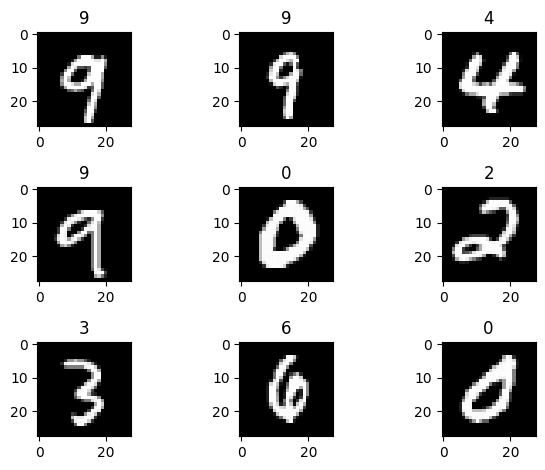

In [17]:
# Plot a random sample from the dataset
indices = np.random.choice(len(x_train), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(x_train[value], cmap="gray")
    plt.title(y_train[value])

plt.tight_layout()
plt.show()

### 1.3 Building the network

When building the classifier notebook there are a few things to keep in mind:
1. The shape of the input data is 2 dimensional. A fully-connected neural network can only handle 1-dimensional data. So we need to "flatten" the data into 1 dimension.
2. The values of the pixels are between 0 and 255. A neural network is better at handling normalized data, with values between 0 and 1. So we have to rescale our input pixel values.
3. This is a classification problem with multiple possible labels. The correct loss function to use in this case is the "categorical cross entropy" loss.

In [62]:
# Import necessary libraries from keras
from tensorflow.keras import layers

# Build a model using the "Sequential" API
model = keras.Sequential([
      layers.Flatten(input_shape=(28, 28)), # Flatten 2D input to 1D input
      layers.Dense(128, activation='relu'), # First hidden layer with 128 neurons, ReLU activation
      layers.Dense(10) # Final layer to predict the label, with 10 classes
  ])

2023-02-23 16:31:17.301411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-23 16:31:17.301467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vikram-Precision-7720): /proc/driver/nvidia/version does not exist
2023-02-23 16:31:17.302063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


This model will output 10 numbers. We need to convert these 10 numbers into probabilities, and then create a loss function on top of these probabilities that checks whether the true label has the highest probability. Both of these steps can be done with one loss function in Keras, which is the "sparse categorical crossentropy" loss function. The parameter "from_logits = True" ensures that ther output of the neural network is first converted into a log probability. (If we didn't do from_logits=True, we would first have to apply a softmax activation layer on the output to convert the output to probabilities).

In [63]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # The Adam optimizer (an improvement over stochastic gradient descent)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function for multi-class classification
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Print the accuracy after each epoch
)

### 1.4 Training the model

Now we feed the training features and labels to the model and train it for several epochs using backpropagation and the Adam optimizer.

In [64]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 4.5718 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.9369 - val_sparse_categorical_accuracy: 0.9118
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.6730 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.4956 - val_sparse_categorical_accuracy: 0.9213
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3555 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.3975 - val_sparse_categorical_accuracy: 0.9255
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.2560 - sparse_categorical_accuracy: 0.9416 - val_loss: 0.3355 - val_sparse_categorical_accuracy: 0.9402
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2059 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.3161 - val_sparse_categorical_accuracy: 0.9420
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1746 - sparse_categorica

We can see the accuracy is over 95% at the end of the last epoch!

### 1.5 Visualize the results

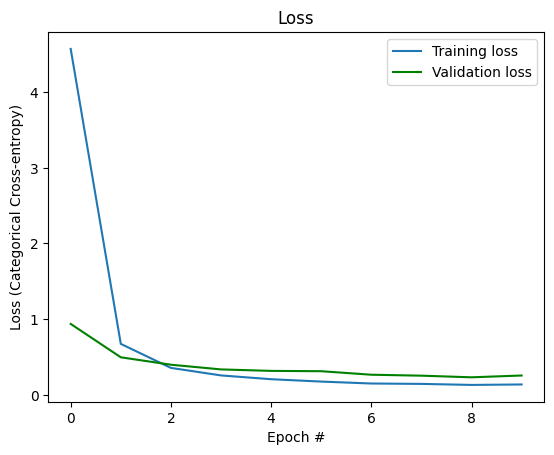

In [65]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Categorical Cross-entropy)')
plt.title('Loss')
plt.legend()

In [118]:
# Evaluate model on test set

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2976000905036926
Test accuracy: 0.95169997215271


Test your model! The code below lets you draw a digit using the mouse. Save your image using the "Save" button then close the image window. You will then have access to the image you drew in the "test_img" variable. Run the code in the cells below to test your model's predictions (or to test how good your handwriting is using a mouse).

In [132]:
from PIL import ImageTk, Image, ImageDraw, ImageChops 
import PIL
from tkinter import *

width = 300  # canvas width
height = 300 # canvas height
center = height//2
white = (255) # canvas back

test_img = np.array((28,28))

def save():
    global test_img
    invert_image = ImageChops.invert(output_image)
    new_image = invert_image.resize((28, 28))
    test_img = np.array(new_image)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

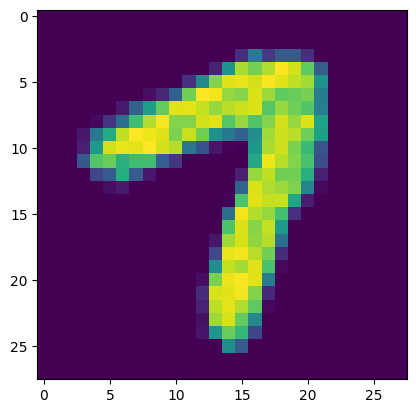

In [133]:
plt.imshow(test_img)

In [134]:
# Reshape the image dimensions to feed it to the model
reshaped_img = np.expand_dims(test_img, 0)

# Make prediction
pred = model.predict(reshaped_img)

# Check which digit this corresponds to
predicted_digit = np.argmax(pred)

1/1 [==============================] - 0s 18ms/step


In [135]:
pred

array([[-44.269573 ,  -5.5354123,  -3.6923246,  -2.527027 ,  -7.605169 ,
        -15.438478 , -22.392181 ,   5.631762 ,   0.3230797,  -3.321411 ]],
      dtype=float32)

In [136]:
predicted_digit

7

Do you get good predictions on your personal handwritten digits? If not, take a look at the images in the training set again, and compare them to what your handwritten digits look like. This is a good lesson to learn - your training performance can be fantastic, but if your training data is not representative of the real world data you feed your trained model, your performance in the real world will not be up to standards!

## 5 Exercises

#### Question 1: Visit the website of the [TensorFlow Playground](https://playground.tensorflow.org/). Under "Problem type", select "Classification". On the left, select the fourth dataset, that looks like a spiral pattern. Make the "Ratio of training to test data:" 80%.

#### Your task in this question is to play around with the number of hidden layers, number of neurons per hidden layer, learning rate, batch size, and activation functions, until you get a network that can make a good classification (low loss) on the training dataset.

#### Question 2: Once you have a model that works, implement it in this notebook in TensorFlow. The code below creates the dataset for you.

<AxesSubplot: xlabel='x1', ylabel='x2'>

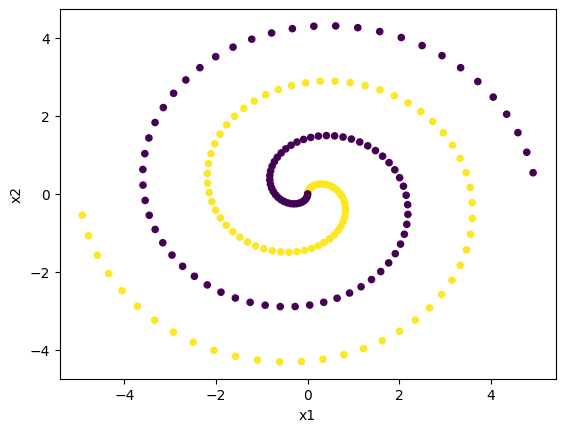

In [138]:
import random
import math
from typing import List

class Example2D:
    def __init__(self, x: float, y: float, label: int):
        self.x = x
        self.y = y
        self.label = label

def classifySpiralData(numSamples: int, noise: float) -> List[Example2D]:
    points = []
    n = int(numSamples / 2)

    def genSpiral(deltaT: float, label: int) -> None:
        for i in range(n):
            r = i / n * 5
            t = 1.75 * i / n * 2 * 3.14159 + deltaT
            x = r * math.sin(t) + random.uniform(-1, 1) * noise
            y = r * math.cos(t) + random.uniform(-1, 1) * noise
            points.append(Example2D(x, y, label))

    genSpiral(0, 1) # Positive examples.
    genSpiral(3.14159, -1) # Negative examples.
    return points


points = classifySpiralData(200, 0)

x1 = [p.x for p in points]
x2 = [p.y for p in points]
y = [p.label for p in points]

# This is your dataset
pointsdf = pd.DataFrame(data={'x1': x1, 'x2': x2})

# These are your labels
labelsdf = pd.Series(y)

pointsdf.plot.scatter('x1', 'x2', c=y)

In [ ]:
# Your code here





#### Question 3:

For this question you will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. As with the MNIST dataset, your task will be to classify the images in the dataset using a neural network. You may use this [tutorial](https://www.tensorflow.org/tutorials/keras/classification) as a guide, but please try as far as possible to do this on your own, using what you have learned in this notebook as a reference.

In [139]:
# Getting the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### a) Visualize the images in the dataset and explore the labels.

#### b) Build a neural network to classify the images. Use an appropriate loss and optimizer to compile it.

#### c) Train your model. What is the final loss of your model? What is the final accuracy? How does this accuracy compare to random guessing on this dataset?

#### d) Evaluate your model on the test dataset. Visualize the loss curve.